---

# Introducción al Aprendizaje Automático (Machine Learning)

- Curso original: [Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning)

| Id | Lección | URL Original | Traducción | Ejercicios |
|----|---------------------------------------------|-----------------------------------------|-------------------------------------------------------------|----------------|
| 1 | **Funcionamiento de los Modelos** | [How Models Work](https://www.kaggle.com/code/dansbecker/how-models-work) | [Funcionamiento de los Modelos](https://www.kaggle.com/code/beta3logic/funcionamiento-de-los-modelos-m01-c03) | **No Disponible** |
| 2 | **Exploración Básica de Datos** | [Basic Data Exploration](https://www.kaggle.com/code/dansbecker/basic-data-exploration) | [Exploración Básica de Datos](https://www.kaggle.com/code/beta3logic/exploraci-n-b-sica-de-datos-m02-co3) | [Ejercicios](https://www.kaggle.com/code/beta3logic/ejercicios-exploraci-n-b-sica-de-datos-me02-co3) |
| 3 | **Tu Primer Modelo de Machine Learning** | [Your First Machine Learning Model](https://www.kaggle.com/code/dansbecker/your-first-machine-learning-model) | [Tu Primer Modelo de Machine Learning](https://www.kaggle.com/code/beta3logic/tu-primer-modelo-de-machine-learning-m03-co3) | [Ejercicios](https://www.kaggle.com/code/beta3logic/ejercicios-modelo-de-machine-learning-me03-co3) |
| 4 | **Validación del Modelo** | [Model Validation](https://www.kaggle.com/code/dansbecker/model-validation) | [Validación del Modelo](https://www.kaggle.com/code/beta3logic/validaci-n-del-modelo-m04-c03) | [Ejercicios](https://www.kaggle.com/code/beta3logic/ejercicios-validaci-n-del-modelo-me04-c03) |
| 5 | **Sobreajuste y Subajuste** | [Underfitting and Overfitting](https://www.kaggle.com/code/dansbecker/underfitting-and-overfitting) | [Sobreajuste y Subajuste](https://www.kaggle.com/code/beta3logic/sobreajuste-y-subajuste-m05-c03) | [Ejercicios](https://www.kaggle.com/code/beta3logic/ejercicios-sobreajuste-y-subajuste-me05-c03) |
| 6 | **Árboles Aleatorios** | [Random Forests](https://www.kaggle.com/code/dansbecker/random-forests) | **Este Módulo** | [Ejercicios](https://www.kaggle.com/code/beta3logic/ejercicios-arboles-aleatorios-me06-c03) |
| 7 | **Competencias Machine Learning** | [Machine Learning Competitions](https://www.kaggle.com/code/alexisbcook/machine-learning-competitions) | [Competencias Machine Learning](https://www.kaggle.com/code/beta3logic/competencias-machine-learning-m07-c03) | [Ejercicios](https://www.kaggle.com/code/beta3logic/ejercicio-competencias-machine-learning-me07-c03) |

- Instructores y autores originales: [Alexis Cook](https://www.kaggle.com/alexisbcook), [Dan Becker](https://www.kaggle.com/dansbecker), [Ryan Holbrook](https://www.kaggle.com/ryanholbrook)

---
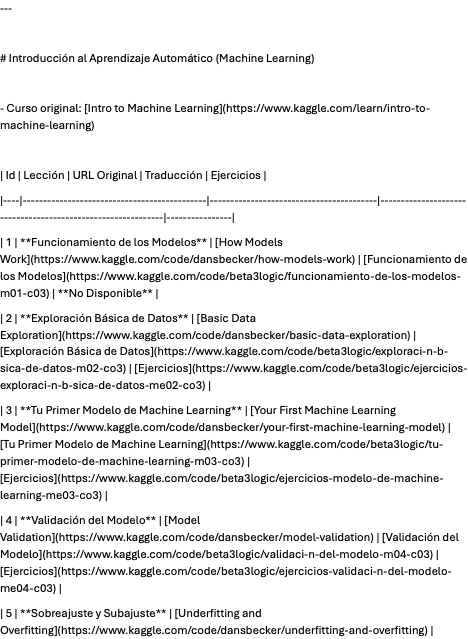
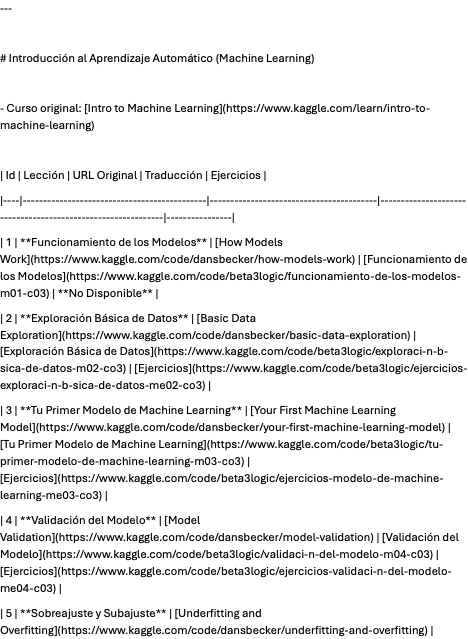
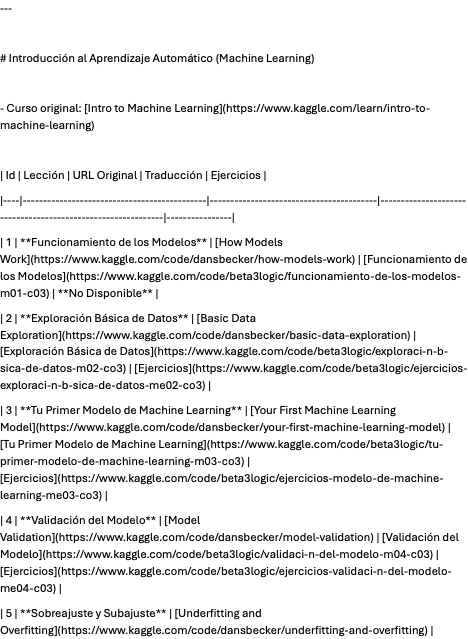
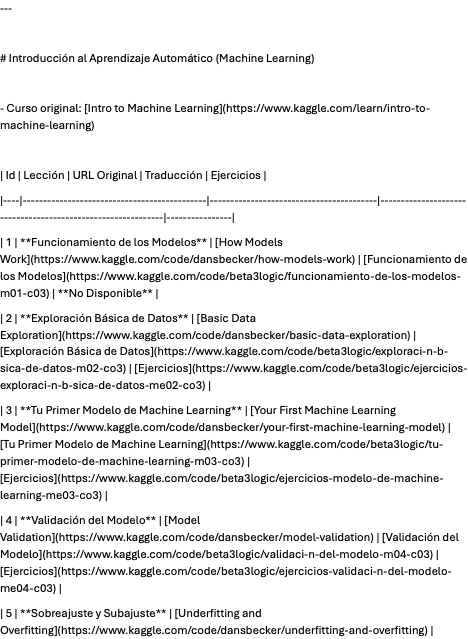

# Introducción

Los árboles de decisión (normales e individuales) te dejan con una decisión difícil. Un árbol profundo con muchas hojas sufrirá **sobreajuste** porque cada predicción proviene de datos históricos de solo las pocas casas en su hoja. Pero un árbol superficial con pocas hojas tendrá un rendimiento pobre porque no captura tantas distinciones en los datos originales.

Incluso las técnicas de modelado más sofisticadas de hoy enfrentan esta tensión entre **subajuste** y **sobreajuste**. Sin embargo, muchos modelos tienen ideas ingeniosas que pueden conducir a un mejor rendimiento. Veremos el **bosque aleatorio** como ejemplo.

El bosque aleatorio utiliza **muchos árboles** y hace una predicción **promediando** las predicciones de cada árbol componente. Generalmente tiene una precisión predictiva mucho mejor que un solo árbol de decisión y funciona bien con parámetros predeterminados. Si continúas modelando, puedes aprender modelos con incluso mejor rendimiento, pero muchos de ellos son sensibles a obtener los parámetros correctos.

# Ejemplo

Ya has visto el código para cargar los datos varias veces. Al final de la carga de datos, tenemos las siguientes variables:
- train_X
- val_X
- train_y
- val_y

In [1]:
import pandas as pd
    
# Cargar datos
melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filtrar filas con valores faltantes
melbourne_data = melbourne_data.dropna(axis=0)
# Elegir variable objetivo y características
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# dividir datos en entrenamiento y validación, tanto para características como para el objetivo
# La división se basa en un generador de números aleatorios. Proporcionar un valor numérico al
# argumento random_state garantiza que obtengamos la misma división cada vez que
# ejecutamos este script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

Construimos un modelo de bosque aleatorio de manera similar a como construimos un árbol de decisión en scikit-learn, esta vez usando la clase `RandomForestRegressor` en lugar de `DecisionTreeRegressor`.

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

191669.7536453626


# Conclusión
Es probable que aún haya margen para mejorar, pero esto ya representa una gran mejora respecto al mejor error del árbol de decisión, que era de 250,000. Existen parámetros que permiten ajustar el rendimiento del Bosque Aleatorio, de forma similar a como modificamos la profundidad máxima en el árbol de decisión único. Sin embargo, una de las mejores características de los modelos de Bosque Aleatorio es que generalmente funcionan razonablemente bien incluso sin este ajuste fino.

# Tu Turno
Prueba **[usando un modelo de Bosque Aleatorio (inglés)](https://www.kaggle.com/kernels/fork/1259186)** tú mismo y observa cuánto mejora tu modelo.

---

*¿Tienes preguntas o comentarios? Visita el [foro de discusión del curso (inglés)](https://www.kaggle.com/learn/intro-to-machine-learning/discussion) para conversar con otros estudiantes.*

```
  _  __    _    ____  ____ _     _____ 
 | |/ /   / \  / ___|/ ___| |   | ____| 
 | ' /   / _ \| |  _| |  _| |   |  _|  
 | . \  / ___ \ |_| | |_| | |___| |___ 
 |_|\_\/_/   \_\____|\____|_____|_____|
                                       
```